In [2]:
from model import GeoModel, GeoModelValidator, Heatmap, MidpointNormalize

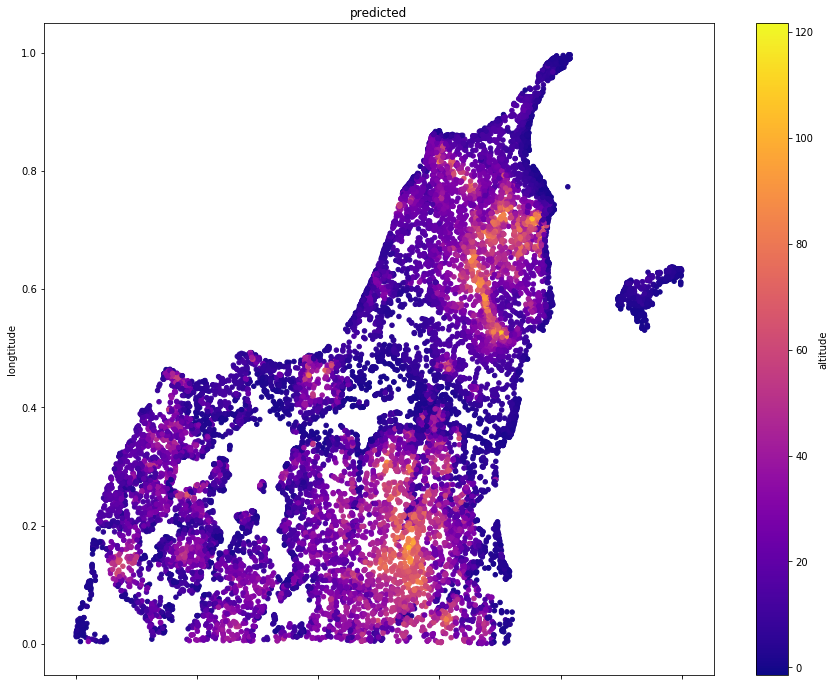

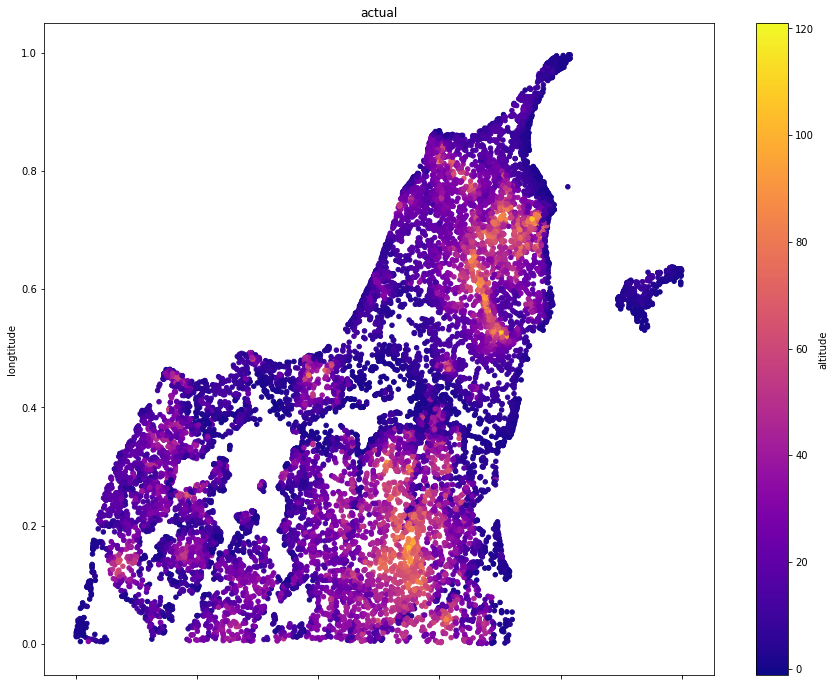

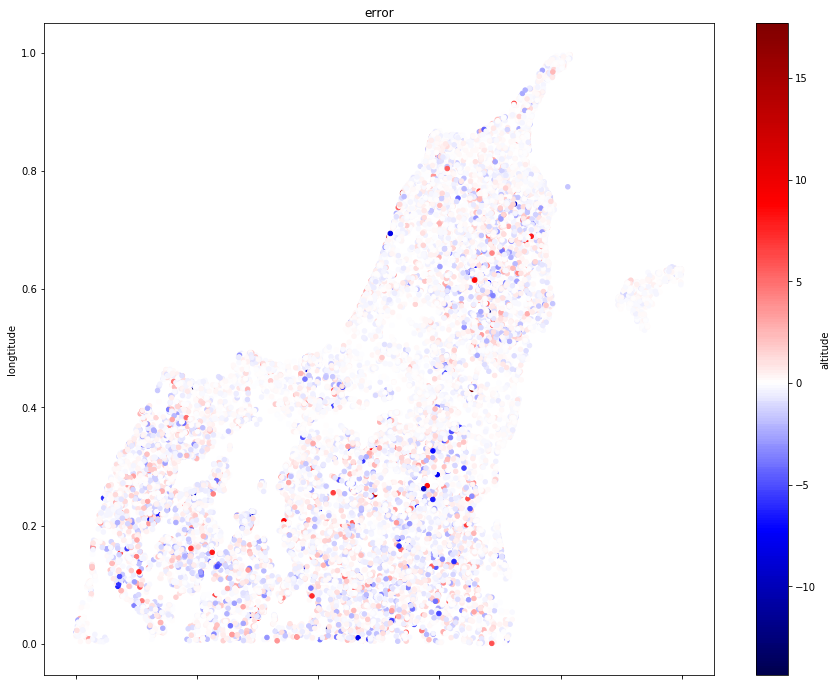

In [4]:
for validation in GeoModelValidator.run('data.csv', 20, 2, 1):
    for chart in Heatmap._fields:
        df = getattr(validation.heatmap, chart)
        if chart == 'error':
            error_min = df[GeoModel.Columns.ALTITUDE].min()
            error_max = df[GeoModel.Columns.ALTITUDE].max()
            kwargs = {'colormap': 'seismic', 'norm': MidpointNormalize(error_min,
                                                                       error_max,
                                                                       0.)}
        else:
            kwargs = {'colormap': 'plasma'}
        df.plot(kind='scatter',
                title=chart,
                x=GeoModel.Columns.LATITUDE,
                y=GeoModel.Columns.LONGTITUDE,
                c=GeoModel.Columns.ALTITUDE,
                figsize=(15, 12),
                **kwargs)